In [ ]:
import pandas as pd
print(pd.__version__)

1.0.5


In [ ]:
data=pd.read_csv('/content/train_loan.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
data.shape

(614, 13)

In [ ]:
#data.isnull

In [ ]:
data['Gender'].fillna(data['Gender'].mode()[0],inplace=True)
data['Married'].fillna(data['Married'].mode()[0],inplace=True)
data['Dependents'].fillna(data['Dependents'].mode()[0],inplace=True)
data['Married'].fillna(data['Married'].mode()[0],inplace=True)
data['Education'].fillna(data['Education'].mode()[0],inplace=True)
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0],inplace=True)
data['ApplicantIncome'].fillna(data['ApplicantIncome'].mode()[0],inplace=True)
data['CoapplicantIncome'].fillna(data['CoapplicantIncome'].mode()[0],inplace=True)
data['LoanAmount'].fillna(data['LoanAmount'].mode()[0],inplace=True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0],inplace=True)
data['Credit_History'].fillna(data['Credit_History'].mode()[0],inplace=True)
data['Property_Area'].fillna(data['Property_Area'].mode()[0],inplace=True)
data['Loan_Status'].fillna(data['Loan_Status'].mode()[0],inplace=True)


In [ ]:
data['Gender']=data['Gender'].replace({'Male': 1,'Female': 0})
data['Married']=data['Married'].map({'Yes': 1,'No': 0})
#data['Dependents']=data['Dependents'].map({'1':1,'2':2,'3':3})
data['Education']=data['Education'].map({'Graduate':1,'Not Graduate': 0})
data['Self_Employed']=data['Self_Employed'].map({'Yes':1,'No': 0})
data['Property_Area']=data['Property_Area'].map({'Urban':1,'Rural':0})
data['Loan_Status']=data['Loan_Status'].map({'Y':1,'N':0})


In [ ]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,120.0,360.0,1.0,1.0,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0.0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1.0,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1.0,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1.0,1


In [ ]:
data['Gender'] = (data['Gender']-data['Gender'].min())/(data['Gender'].max()-data['Gender'].min())


In [ ]:
data['Married'] = (data['Married']-data['Married'].min())/(data['Married'].max()-data['Married'].min())



In [ ]:

#data['Dependents'] = (data['Dependents']-data['Dependents'].min())/(data['Dependents'].max()-data['Dependents'].min())


In [ ]:
data['Education'] = (data['Education']-data['Education'].min())/(data['Education'].max()-data['Education'].min())
data['Self_Employed'] = (data['Self_Employed']-data['Self_Employed'].min())/(data['Self_Employed'].max()-data['Self_Employed'].min())
data['ApplicantIncome'] = (data['ApplicantIncome']-data['ApplicantIncome'].min())/(data['ApplicantIncome'].max()-data['ApplicantIncome'].min())
data['CoapplicantIncome'] = (data['CoapplicantIncome']-data['CoapplicantIncome'].min())/(data['CoapplicantIncome'].max()-data['CoapplicantIncome'].min())
data['LoanAmount'] = (data['LoanAmount']-data['LoanAmount'].min())/(data['LoanAmount'].max()-data['LoanAmount'].min())
data['Loan_Amount_Term'] = (data['Loan_Amount_Term']-data['Loan_Amount_Term'].min())/(data['Loan_Amount_Term'].max()-data['Loan_Amount_Term'].min())
data['Credit_History'] = (data['Credit_History']-data['Credit_History'].min())/(data['Credit_History'].max()-data['Credit_History'].min())
data['Property_Area'] = (data['Property_Area']-data['Property_Area'].min())/(data['Property_Area'].max()-data['Property_Area'].min())
data['Loan_Status'] = (data['Loan_Status']-data['Loan_Status'].min())/(data['Loan_Status'].max()-data['Loan_Status'].min())

In [ ]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0,1.0,0.0,0.070489,0.000000,0.160637,0.74359,1.0,1.0,1.0
1,LP001003,1.0,1.0,1,1.0,0.0,0.054830,0.036192,0.172214,0.74359,1.0,0.0,0.0
2,LP001005,1.0,1.0,0,1.0,1.0,0.035250,0.000000,0.082489,0.74359,1.0,1.0,1.0
3,LP001006,1.0,1.0,0,0.0,0.0,0.030093,0.056592,0.160637,0.74359,1.0,1.0,1.0
4,LP001008,1.0,0.0,0,1.0,0.0,0.072356,0.000000,0.191027,0.74359,1.0,1.0,1.0


In [ ]:
data.to_csv('loan_data.csv',index=False)

In [ ]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
print(sklearn.__version__)

0.22.2.post1


In [ ]:
#data.head()

In [ ]:
data.dtypes

Loan_ID               object
Gender               float64
Married              float64
Dependents            object
Education            float64
Self_Employed        float64
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area        float64
Loan_Status          float64
dtype: object

In [ ]:
data1 = data.drop(['Dependents','Loan_ID'],axis=1)
#data1.head()


In [ ]:
X=data1.drop('Loan_Status',axis=1)
y=data1['Loan_Status']
x_train,x_test,y_train,y_test = train_test_split(X,y,stratify=data1['Loan_Status'],random_state=10,test_size=0.3)

In [ ]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((429, 10), (185, 10), (429,), (185,))

In [ ]:
import keras
print(keras.__version__)

2.4.3


In [ ]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [ ]:
from keras.models import Sequential
from keras.layers import InputLayer,Dense

In [ ]:
x_train.shape
x_train.shape[1]

10

In [ ]:
input_neurons = x_train.shape[1]
output_neurons = 1

In [ ]:
number_of_hidden_layers = 2
neuron_hidden_layer_1 = 10
neuron_hidden_layer_2 = 5

In [ ]:
model = Sequential()
model.add(InputLayer(input_shape=(input_neurons,)))
model.add(Dense(units=neuron_hidden_layer_1,activation='relu'))
model.add(Dense(units=neuron_hidden_layer_2,activation='relu'))
model.add(Dense(units=output_neurons,activation='sigmoid'))


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_4 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 6         
Total params: 171
Trainable params: 171
Non-trainable params: 0
_________________________________________________________________


In [ ]:
input_neurons*neuron_hidden_layer_1

100

In [ ]:
input_neurons*neuron_hidden_layer_1+10

110

In [ ]:
neuron_hidden_layer_1*neuron_hidden_layer_2+5

55

In [ ]:
neuron_hidden_layer_2*output_neurons + 1

6

In [ ]:
model.compile(loss= 'binary_crossentropy', optimizer = 'Adam',metrics=['accuracy'])

In [ ]:
model_history = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100)

Epoch 1/100
14/14 [==============================] - 0s 26ms/step - loss: nan - accuracy: 0.3124 - val_loss: nan - val_accuracy: 0.3135
Epoch 2/100
14/14 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.3124 - val_loss: nan - val_accuracy: 0.3135
Epoch 3/100
14/14 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.3124 - val_loss: nan - val_accuracy: 0.3135
Epoch 4/100
14/14 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.3124 - val_loss: nan - val_accuracy: 0.3135
Epoch 5/100
14/14 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.3124 - val_loss: nan - val_accuracy: 0.3135
Epoch 6/100
14/14 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.3124 - val_loss: nan - val_accuracy: 0.3135
Epoch 7/100
14/14 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.3124 - val_loss: nan - val_accuracy: 0.3135
Epoch 8/100
14/14 [==============================] - 0

In [ ]:
prediction = model.predict_classes(x_test)
accuracy_score (y_test,prediction)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:457: RuntimeWarning: invalid value encountered in greater
  return (proba > 0.5).astype('int32')


0.31351351351351353

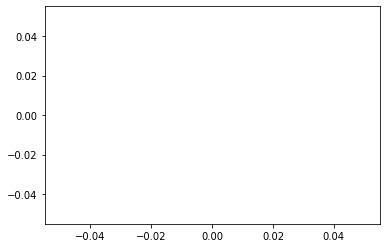

In [ ]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])